In [1]:
import pandas as pd
import numpy as np

In [2]:
dir_path = './CMaps/'
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfr_dmd', 'W31', 'W32'] 
col_names = index_names + setting_names + sensor_names

In [3]:
def open_df(number):
    train = pd.read_csv((dir_path+'train_FD00' + str(number) + '.txt'), sep='\s+', header=None, names=col_names)
    test = pd.read_csv((dir_path+'test_FD00' + str(number) + '.txt'), sep='\s+', header=None, names=col_names)
    y_test = pd.read_csv((dir_path+'RUL_FD00' + str(number) + '.txt'), sep='\s+', header=None, names=['RUL'])
    return train, test, y_test

In [4]:
train, test, y_test = open_df(1)

In [5]:
train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfr_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
test.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfr_dmd,W31,W32
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [7]:
y_test.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

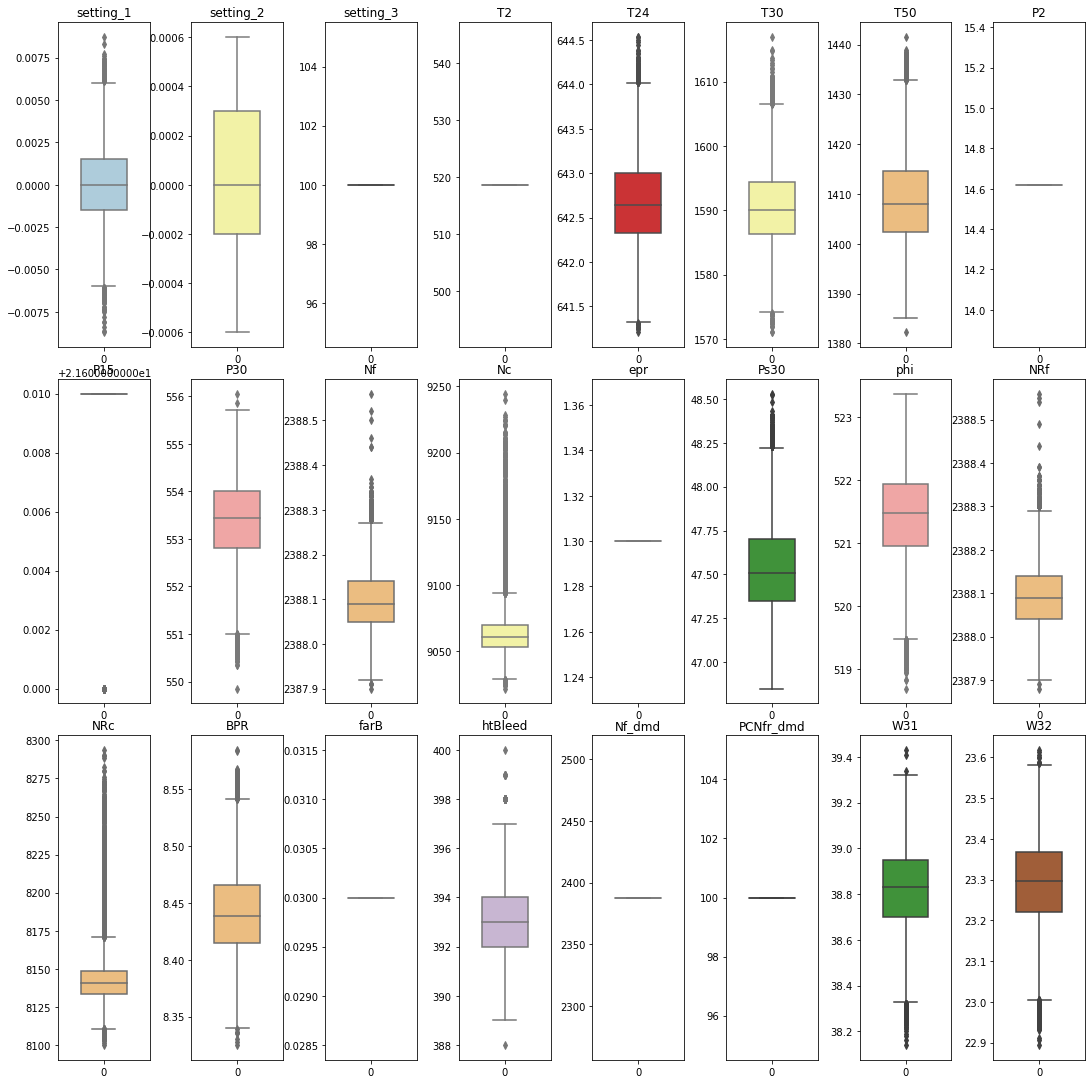

In [9]:
fig, axes = plt.subplots(int(len(train.columns[2:])/8), 8, figsize=(15, 15))
fig.tight_layout()
i, j = 0, 0 
for feature in train.columns[2:]:
    sns.boxplot(ax=axes[i, j], data=train[feature], width=0.5, color=random.choice(sns.color_palette("Paired"))).set(title=feature)
    j = j + 1
    if j == 8:
        j = 0
        i = i + 1

In [10]:
drop_labels = ['setting_3', 'T2', 'P2', 'epr', 'farB', 'Nf_dmd', 'PCNfr_dmd']
train = train.drop(drop_labels, axis=1)

In [11]:
def add_remaining_useful_life(df):
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

In [12]:
train = add_remaining_useful_life(train)

In [13]:
drop_labels = index_names + drop_labels

In [14]:
X_train = train.drop(index_names, axis=1)
y_train = X_train.pop('RUL')
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [15]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

In [17]:
def scaling(scaler):
    scaled_X_train=scaler.fit_transform(X_train)
    scaled_X_test=scaler.transform(X_test)
    return scaled_X_train, scaled_X_test

In [18]:
y_train_clipped = y_train.clip(upper=123)

In [19]:
# Yapay Sinir Ağı için kullanılacak kütüphanelerin tanımlanması
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
tf.random.set_seed(1)

In [20]:
def LSTM_ANN():
    model = Sequential() # Sıralı modelin tanımlanması
    model.add(LSTM(units=50, return_sequences=True, input_shape=(scaled_X_train.shape[1], 1))) # Giriş katmanı için LSTM modeli 
    model.add(LSTM(50,return_sequences=False)) # Gizli katman olarak ikincil LSTM katmanı
    model.add(Dense(25)) # Gizli katman olarak yoğunluk katmanı
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error') # Modelin tamamlanması
    return model

In [21]:
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer()]

In [22]:
from sklearn.metrics import mean_squared_error as mse
import time
rmses = []
runtimes = []
for scaler in scalers:
    start = time.time()
    scaled_X_train, scaled_X_test = scaling(scaler) # Verilerin ölçeklendirilmesi
    model = LSTM_ANN() # Modelin tanımlanması
    model.fit(scaled_X_train, y_train_clipped, epochs = 100, batch_size = 32, verbose = 0) # Modelin eğitilmesi
    y_pred = model.predict(scaled_X_test) # Tahminlerin yapılması
    rmse = np.sqrt(mse(y_test, y_pred)) # RMSE'nin hesaplanması
    rmses.append(rmse)
    end = time.time()
    runtimes.append(str(round((end - start)/60,2)) + ' minutes')
    print(type(scaler).__name__, 'is Done!')

MinMaxScaler is Done!
MaxAbsScaler is Done!
StandardScaler is Done!
RobustScaler is Done!
Normalizer is Done!
QuantileTransformer is Done!


In [23]:
d = {'Scaler': scalers, 'RMSE': rmses , 'Runtime': runtimes}
results_LSTM = pd.DataFrame(data=d)

In [24]:
results_LSTM # LSTM modeli için tüm sonuçlar

,Scaler,RMSE,Runtime
0,MinMaxScaler(),18.735811,25.08 minutes
1,MaxAbsScaler(),42.634660,14.62 minutes
2,StandardScaler(),21.970679,12.46 minutes
3,RobustScaler(),21.370298,12.23 minutes
4,Normalizer(),42.632238,13.87 minutes
5,QuantileTransformer(),18.783318,13.86 minutes


In [25]:
from tensorflow.keras.layers import Conv1D, Flatten

In [26]:
def CNN():
    model = Sequential()
    model.add(Conv1D(32, 2, activation="relu", input_shape=(scaled_X_train.shape[1], 1))) # Giriş katmanı için CNN modeli 
    model.add(Flatten()) # Giriş değerlerinin düzleştirilmesi için gizli katman
    model.add(Dense(64, activation="relu")) # Gizli katman olarak yoğunluk katmanı
    model.add(Dense(1))
    model.compile(loss="mse", optimizer='adam')
    return model

In [27]:
from sklearn.metrics import mean_squared_error as mse
import time
rmses = []
runtimes = []
for scaler in scalers:
    start = time.time()
    scaled_X_train, scaled_X_test = scaling(scaler)
    model = CNN()
    model.fit(scaled_X_train, y_train_clipped, epochs = 100, batch_size = 32, verbose = 0)
    y_pred = model.predict(scaled_X_test)
    rmse = np.sqrt(mse(y_test, y_pred))
    rmses.append(rmse)
    end = time.time()
    runtimes.append(str(round((end - start)/60,2)) + ' minutes')
    print(type(scaler).__name__, 'is Done!')

MinMaxScaler is Done!
MaxAbsScaler is Done!
StandardScaler is Done!
RobustScaler is Done!
Normalizer is Done!
QuantileTransformer is Done!


In [28]:
d = {'Scaler': scalers, 'RMSE': rmses , 'Runtime': runtimes}
results_CNN = pd.DataFrame(data=d)

In [29]:
results_CNN # CNN modeli için tüm sonuçlar

,Scaler,RMSE,Runtime
0,MinMaxScaler(),18.565525,1.16 minutes
1,MaxAbsScaler(),20.218862,1.27 minutes
2,StandardScaler(),18.623400,1.3 minutes
3,RobustScaler(),18.805727,1.18 minutes
4,Normalizer(),43.058696,1.35 minutes
5,QuantileTransformer(),19.095682,1.38 minutes
